LSTM

In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#@title Default title text
df=pd.read_csv("Dec.csv",index_col=False)

In [ ]:
df

,Timestamp,Open,High,Low,Close
0,02 May 2024 18:30:00,96.695,96.695,96.690,96.690
1,02 May 2024 18:40:00,96.690,96.690,96.685,96.685
2,02 May 2024 18:50:00,96.685,96.690,96.685,96.690
3,02 May 2024 19:00:00,96.690,96.695,96.685,96.690
4,02 May 2024 19:10:00,96.690,96.695,96.690,96.690
...,...,...,...,...,...
1872,30 May 2024 13:00:00,96.620,96.625,96.615,96.625
1873,30 May 2024 13:10:00,96.625,96.630,96.620,96.620
1874,30 May 2024 13:20:00,96.620,96.620,96.615,96.615
1875,30 May 2024 13:30:00,96.615,96.615,96.615,96.615


In [ ]:
# cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
# cols1=['Date', 'High', 'Low', 'Open', 'Close','Volume', 'Adj Close' ]
# df.reindex(columns=cols1)
# df.reset_index(drop=True, inplace=True)


In [ ]:
df

,Timestamp,Open,High,Low,Close
0,02 May 2024 18:30:00,96.695,96.695,96.690,96.690
1,02 May 2024 18:40:00,96.690,96.690,96.685,96.685
2,02 May 2024 18:50:00,96.685,96.690,96.685,96.690
3,02 May 2024 19:00:00,96.690,96.695,96.685,96.690
4,02 May 2024 19:10:00,96.690,96.695,96.690,96.690
...,...,...,...,...,...
1872,30 May 2024 13:00:00,96.620,96.625,96.615,96.625
1873,30 May 2024 13:10:00,96.625,96.630,96.620,96.620
1874,30 May 2024 13:20:00,96.620,96.620,96.615,96.615
1875,30 May 2024 13:30:00,96.615,96.615,96.615,96.615


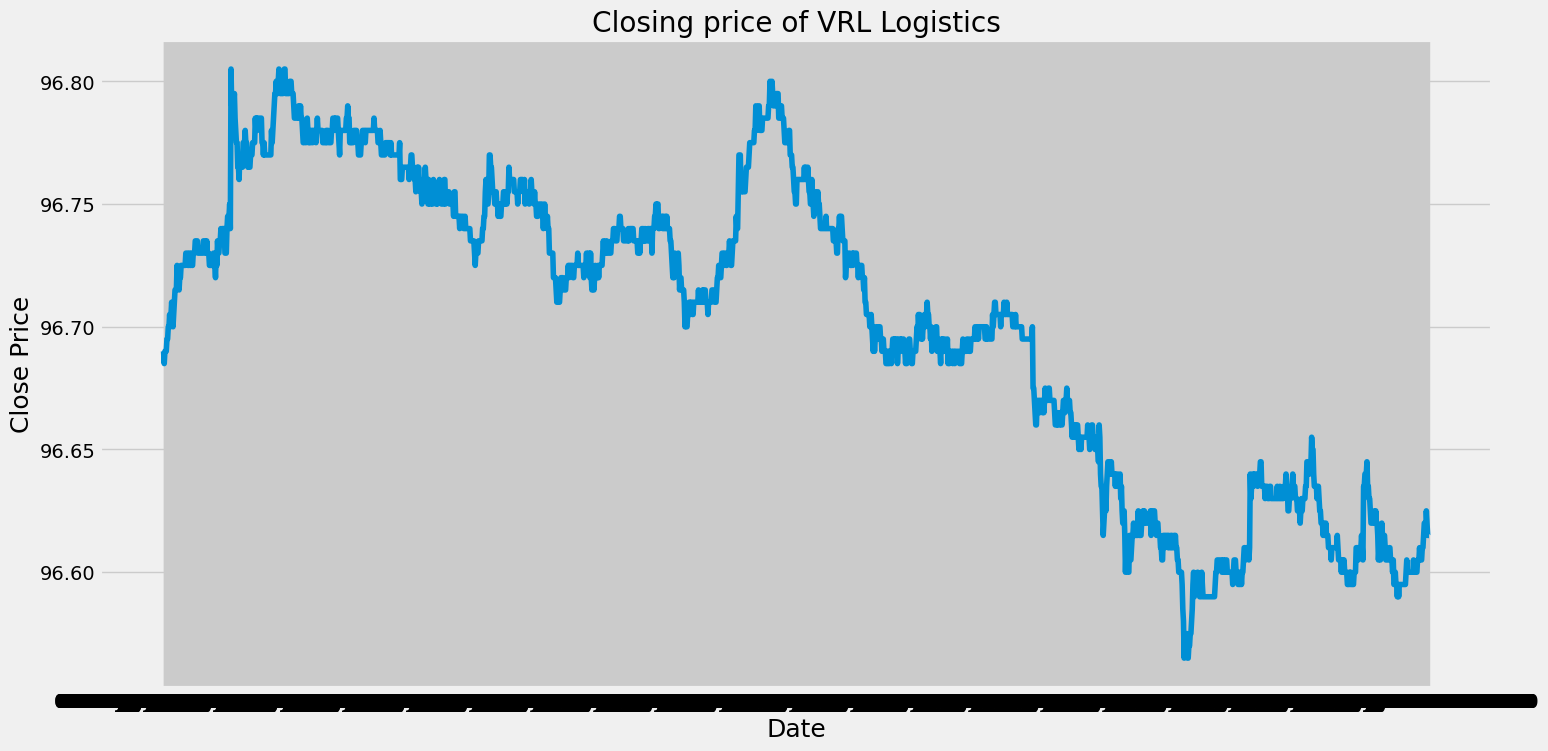

In [ ]:
#visulalize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price of VRL Logistics')
plt.plot(df['Timestamp'],df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
data=df[['Close']].copy()

In [ ]:
data

,Close
0,96.690
1,96.685
2,96.690
3,96.690
4,96.690
...,...
1872,96.625
1873,96.620
1874,96.615
1875,96.615


In [ ]:
dataset=data.values

In [ ]:
dataset

array([[96.69 ],
       [96.685],
       [96.69 ],
       ...,
       [96.615],
       [96.615],
       [96.615]])

In [ ]:
type(dataset)

numpy.ndarray

In [ ]:
training_data_len=math.ceil(len(dataset)*.8)

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

In [ ]:
scaled_data[0:5]

array([[0.52083333],
       [0.5       ],
       [0.52083333],
       [0.52083333],
       [0.52083333]])

In [ ]:
train_data= scaled_data[0:training_data_len]

In [ ]:
train_data.shape


(1502, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
len(x_train)

1442

In [ ]:
X,Y=np.array(x_train), np.array(y_train)

In [ ]:
X

array([[0.52083333, 0.5       , 0.52083333, ..., 0.6875    , 0.6875    ,
        0.70833333],
       [0.5       , 0.52083333, 0.52083333, ..., 0.6875    , 0.70833333,
        0.70833333],
       [0.52083333, 0.52083333, 0.52083333, ..., 0.70833333, 0.70833333,
        0.70833333],
       ...,
       [0.20833333, 0.20833333, 0.20833333, ..., 0.1875    , 0.1875    ,
        0.20833333],
       [0.20833333, 0.20833333, 0.20833333, ..., 0.1875    , 0.20833333,
        0.1875    ],
       [0.20833333, 0.20833333, 0.20833333, ..., 0.20833333, 0.1875    ,
        0.20833333]])

In [ ]:
Y

array([0.70833333, 0.70833333, 0.6875    , ..., 0.1875    , 0.20833333,
       0.1875    ])

In [ ]:
#Reshape
X=np.reshape(X, (X.shape[0],X.shape[1],1))

In [ ]:
X.shape

(1442, 60, 1)

In [ ]:
#Build the LSTM model
model=Sequential()


In [ ]:
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)))

In [ ]:
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(X,Y,batch_size=1, epochs=1)

1442/1442 [==============================] - 14s 8ms/step - loss: 0.0024


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index

test_data= scaled_data[training_data_len-60:,:]
#Create the dataset's x_test and y_test
X_test=[]
Y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])


In [ ]:
test_data

array([[0.20833333],
       [0.20833333],
       [0.20833333],
       [0.25      ],
       [0.20833333],
       [0.20833333],
       [0.20833333],
       [0.20833333],
       [0.22916667],
       [0.22916667],
       [0.25      ],
       [0.22916667],
       [0.25      ],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.22916667],
       [0.25      ],
       [0.20833333],
       [0.22916667],
       [0.25      ],
       [0.25      ],
       [0.25      ],
       [0.25      ],
       [0.22916667],
       [0.22916667],
       [0.20833333],
       [0.22916667],
       [0.22916667],
       [0.20833333],
       [0.20833333],
       [0.20833333],
       [0.1875    ],
       [0.1875    ],
       [0.16666667],
       [0.16666667],
       [0.20833333],
       [0.20833333],
       [0.1875    ],
       [0.20833333],
       [0.20833333],
       [0.20833333],
       [0.20833333],
       [0.187

In [ ]:
#Convert the data to a numpy array
X_test=np.array(X_test)

In [ ]:
#Reshape the data
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test

array([[[0.20833333],
        [0.20833333],
        [0.20833333],
        ...,
        [0.1875    ],
        [0.20833333],
        [0.1875    ]],

       [[0.20833333],
        [0.20833333],
        [0.25      ],
        ...,
        [0.20833333],
        [0.1875    ],
        [0.1875    ]],

       [[0.20833333],
        [0.25      ],
        [0.20833333],
        ...,
        [0.1875    ],
        [0.1875    ],
        [0.16666667]],

       ...,

       [[0.16666667],
        [0.16666667],
        [0.16666667],
        ...,
        [0.20833333],
        [0.25      ],
        [0.22916667]],

       [[0.16666667],
        [0.16666667],
        [0.1875    ],
        ...,
        [0.25      ],
        [0.22916667],
        [0.20833333]],

       [[0.16666667],
        [0.1875    ],
        [0.1875    ],
        ...,
        [0.22916667],
        [0.20833333],
        [0.20833333]]])

In [ ]:
#Get the model predicted price values
predictions = model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 4ms/step


In [ ]:
#Get the root mean squared error(RMSE)
rmse= np.sqrt(np.mean(predictions-Y_test)**2)

In [ ]:
rmse

0.0029474666341150167

<ipython-input-88-1ac909e46e82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


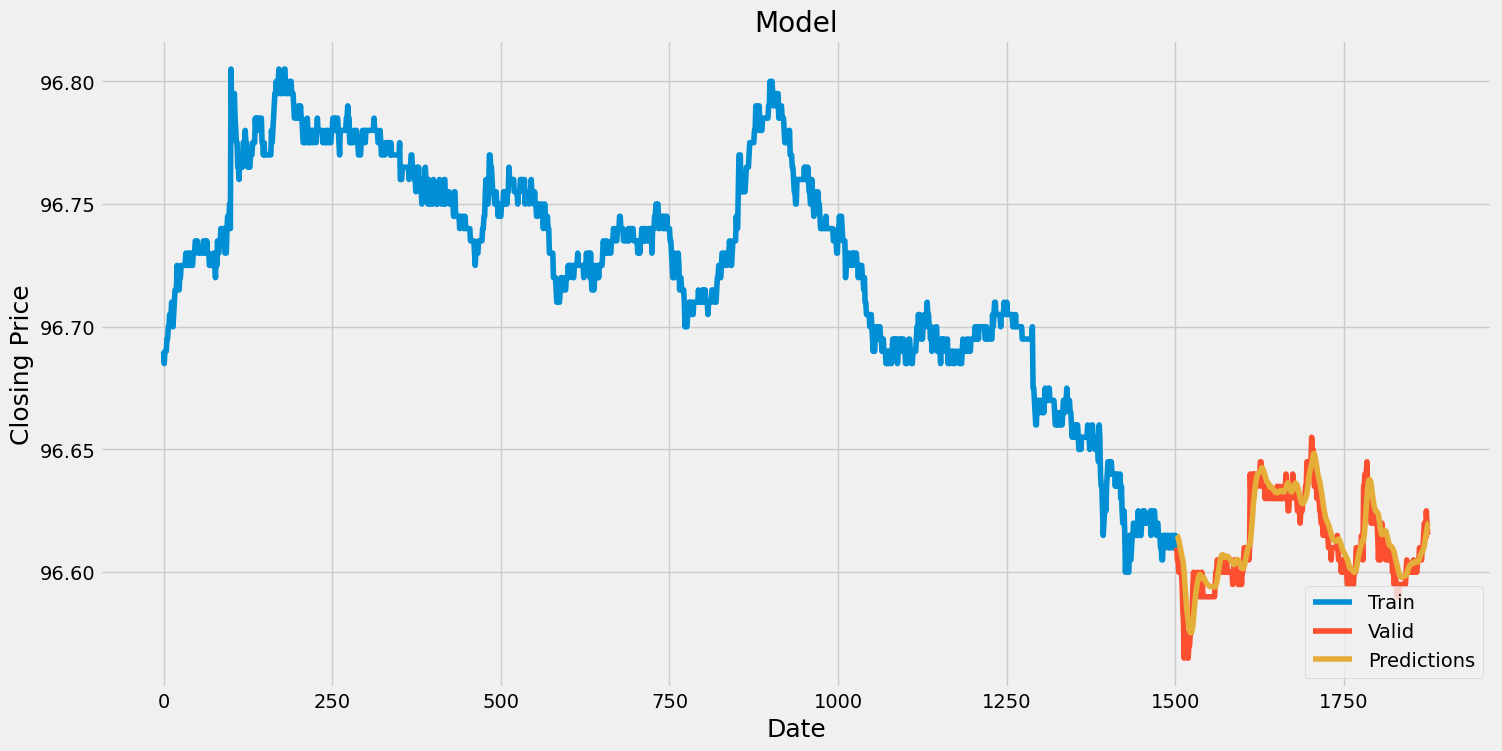

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Closing Price",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Valid","Predictions"],loc="lower right")
plt.show()

In [ ]:
# Assuming you have a trained LSTM model named 'model'
# and a variable 'historical_data' containing your historical closing prices

# Step 1: Prepare Your Data (assuming 'historical_data' is a numpy array)
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

# Reshape data for LSTM input (assuming a timestep of 1)
X_test = np.reshape(scaled_data, (scaled_data.shape[0], 1, 1))

# Step 2: Define Prediction Horizon
prediction_horizon = 20  # For example, predict the next 7 days

# Step 3 & 4: Feed the Model and Predict Future Prices
predicted_prices = []
for _ in range(prediction_horizon):
    # Predict the next day's price
    predicted_price = model.predict(X_test[-1].reshape(1, 1, 1))

    # Inverse transform the predicted price to get the actual price
    predicted_price = scaler.inverse_transform(predicted_price)

    # Append the predicted price to the input data for the next prediction
    X_test = np.append(X_test, predicted_price)

    # Append the predicted price to the list of predicted prices
    predicted_prices.append(predicted_price)

# Print or use predicted_prices
print(predicted_prices)


1/1 [==============================] - 0s 17ms/step
[array([[96.59469]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32), array([[96.76235]], dtype=float32)]


In [ ]:
predicted_prices

[array([[96.59469]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32),
 array([[96.76235]], dtype=float32)]